In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
#Load dataset and give headers
df = pd.read_csv('../data/covtype.data')
df.columns = [str(x) for x in range(0,55)] #name these columns using digits from the range 0-55
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
5,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
6,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
7,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
8,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5
9,2612,201,4,180,51,735,218,243,161,6222,...,0,0,0,0,0,0,0,0,0,5


In [3]:
#categorical wilderness areas for element [0,]
df.iloc[0,10:14]
#categorical wilderness areas for element [6000,]
df.iloc[6000,10:14]
#categorical solil type for element[0,]
df.iloc[0,14:54]
#categorical solil type for element[6000,]
df.iloc[6000,14:54]

14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    1
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
Name: 6000, dtype: int64

In [4]:
#split the dataset into train and test (train = first 15120 rows)
y_train = df.iloc[0:15120, df.shape[1]-1]
y_test = df.iloc[15120:, df.shape[1]-1]

X_train = df.iloc[0:15120, 0:df.shape[1]-1]
X_test = df.iloc[15120:, 0:df.shape[1]-1]

In [5]:
#scale/normalize features X_train[0,1] because the algorithms computes distance(eg LDA)

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test= scaler.transform(X_test)

In [6]:
#Logistic Regression model with multinomial option = ‘lbfgs’
log_reg = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.001, C=1.0, solver='lbfgs', max_iter=10000, multi_class='auto', verbose=1)
log_reg.fit(X_train, y_train)
Y_pred = log_reg.predict(X_test)


lbfgs_score = accuracy_score(y_test,Y_pred)
print("With solver = ‘lbfgs’, accuracy: %f" %lbfgs_score)
f1_score = f1_score(y_test,Y_pred, average='weighted')
print("F1 score %f" %f1_score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


With solver = ‘lbfgs’, accuracy: 0.585251
F1 score 0.621479


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished


In [7]:
#Logistic Regression model with multinomial option = ‘liblinear’
log_reg = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.001, C=1.0, solver='liblinear', max_iter = 10000 , multi_class='auto', verbose=1)
log_reg.fit(X_train, y_train)
Y_pred = log_reg.predict(X_test)


liblinear_score = accuracy_score(y_test,Y_pred)
print("With solver = ‘liblinear’, accuracy: %f" %liblinear_score)

[LibLinear]With solver = ‘liblinear’, accuracy: 0.561474


In [8]:
#Logistic Regression model with multinomial option = ‘newton-cg’
log_reg = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.001, C=1.0, solver='newton-cg', max_iter = 10000 , multi_class='auto', verbose=1)
log_reg.fit(X_train, y_train)
Y_pred = log_reg.predict(X_test)


newtoncg_score = accuracy_score(y_test,Y_pred)
print("With solver = ‘newton-cg’, accuracy: %f" %newtoncg_score)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


With solver = ‘newton-cg’, accuracy: 0.585252


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished


In [9]:
#Logistic Regression model with multinomial option = ‘sag’
log_reg = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.001, C=1.0, solver='sag', max_iter = 10000 , multi_class='auto', verbose=1)
log_reg.fit(X_train, y_train)
Y_pred = log_reg.predict(X_test)


sag_score = accuracy_score(y_test,Y_pred)
print("With solver = ‘sag’, accuracy: %f" %sag_score)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 22 epochs took 1 seconds
With solver = ‘sag’, accuracy: 0.584674


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished


In [10]:
#Logistic Regression model with multinomial option = ‘saga’
log_reg = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.001, C=1.0, solver='saga', max_iter = 10000 , multi_class='auto', verbose=1)
log_reg.fit(X_train, y_train)
Y_pred = log_reg.predict(X_test)


saga_score = accuracy_score(y_test,Y_pred)
print("With solver = ‘saga’, accuracy: %f" %saga_score)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 36 epochs took 2 seconds
With solver = ‘saga’, accuracy: 0.585164


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished


In [11]:
#Analysing sensitivity for parameters
#param tol : Tolerance for stopping criteria. (default=1e-4)

score = []
toler = []
toler.extend([0.00001, 0.0001,0.1, 0.5, 1, 3, 5, 10, 15, 20, 30, 40,50,100,400])
for t in toler:
    #Logistic Regression model with multinomial option = ‘lbfgs’
    log_reg = linear_model.LogisticRegression(penalty='l2', dual=False, tol=t, C=1.0, solver='lbfgs', max_iter=10000, multi_class='auto', verbose=1)
    log_reg.fit(X_train, y_train)
    Y_pred = log_reg.predict(X_test)
    

    lbfgs_score = accuracy_score(y_test,Y_pred)
    score.append(lbfgs_score)
    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

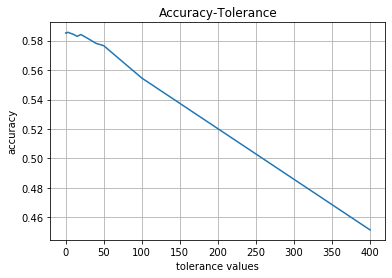

In [12]:
fig = plt.figure()
plt.title("Accuracy-Tolerance")
plt.plot(toler, score,)
plt.grid()
plt.xlabel("tolerance values")
plt.ylabel("accuracy")
plt.show()

In [13]:
#Analysing sensitivity for parameters
#param C : Inverse of regularization strength. (default=1.0)

score = []
c_val = [ 0.001, 0.01, 0.1, 1, 10, 100]
print(c_val)
for c in c_val:
    #Logistic Regression model with multinomial option = ‘lbfgs’
    log_reg = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.001, C=c, solver='lbfgs', max_iter=10000, multi_class='auto', verbose=1)
    log_reg.fit(X_train, y_train)
    Y_pred = log_reg.predict(X_test)
    

    lbfgs_score = accuracy_score(y_test,Y_pred)
    score.append(lbfgs_score)
    
print(score)

[0.001, 0.01, 0.1, 1, 10, 100]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0.3868253780321652, 0.5216923400442841, 0.5660029935093508, 0.5852505164422124, 0.5942716883640136, 0.5954097167122291]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.6s finished


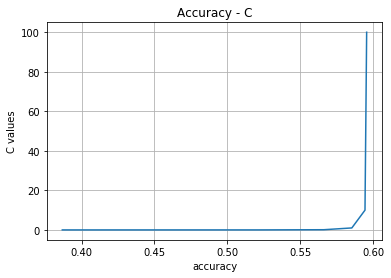

In [14]:
fig = plt.figure()
plt.title("Accuracy - C")
plt.plot(score,c_val)
plt.grid()
plt.ylabel("C values")
plt.xlabel("accuracy")
plt.show()

In [15]:
#Run LDA with solver='svd'
import time
start_time = time.time()
lda = LinearDiscriminantAnalysis(solver='svd', priors=None, tol=0.1).fit(X_train, y_train)
Y_pred = lda.predict(X_test)
print("---Convergence time: %s seconds ---" % (time.time() - start_time))
lda_score = accuracy_score(y_test,Y_pred)

print("LDA with solver='svd', accuracy: %f" %lda_score)
    

---Convergence time: 0.18554401397705078 seconds ---
LDA with solver='svd', accuracy: 0.580962


/home/gtsal/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [16]:
#Run LDA with solver='lsqr' and Shrinkage=0.0001
start_time = time.time()
lda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.0001, priors=None, tol=0.001).fit(X_train, y_train)
Y_pred = lda.predict(X_test)
print("---Convergence time: %s seconds ---" % (time.time() - start_time))
lda_score = accuracy_score(y_test,Y_pred)

print("LDA with solver='lsqr' and Shrinkage=0.0001 , accuracy: %f" %lda_score)
    

---Convergence time: 0.1725001335144043 seconds ---
LDA with solver='lsqr' and Shrinkage=0.0001 , accuracy: 0.581310


In [17]:
#Run LDA with solver='eigen' and Shrinkage=0.0001
start_time = time.time()
lda = LinearDiscriminantAnalysis(solver='eigen', shrinkage=0.0001, priors=None, tol=0.001).fit(X_train, y_train)
Y_pred = lda.predict(X_test)
print("---Convergence time: %s seconds ---" % (time.time() - start_time))
lda_score = accuracy_score(y_test,Y_pred)

print("LDA with solver='eigen', accuracy: %f" %lda_score)
    

---Convergence time: 0.1718287467956543 seconds ---
LDA with solver='eigen', accuracy: 0.581310


In [18]:
#game of thrones

#1) binary classification problem

#2) transform to categorical features with enumeration, normalize data, find if are NaN values exists(if i have problem with lack of data)
